In [1]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

In [10]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']
base_dir=r'.keras\datasets\flower_photos'
print(base_dir)

.keras\datasets\flower_photos


In [12]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'trainA', cl)):
      os.makedirs(os.path.join(base_dir, 'trainA', cl))
    shutil.move(t, os.path.join(base_dir, 'trainA', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'valA', cl)):
      os.makedirs(os.path.join(base_dir, 'valA', cl))
    shutil.move(v, os.path.join(base_dir, 'valA', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [15]:
train_dir = os.path.join(base_dir, 'trainA')
val_dir = os.path.join(base_dir, 'valA')

In [16]:
batch_size =100
IMG_SHAPE = (150,150)

In [17]:

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=(1./255),
    horizontal_flip=True,
)

train_data_gen = image_gen.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(150,150),
    shuffle=True,
    class_mode='categorical' 
)

# val_data_gen = image_gen.flow_from_directory(
#     val_dir,
#     batch_size=batch_size,
#     target_size=(150,150),
#     shuffle=False 
# )

Found 2935 images belonging to 5 classes.


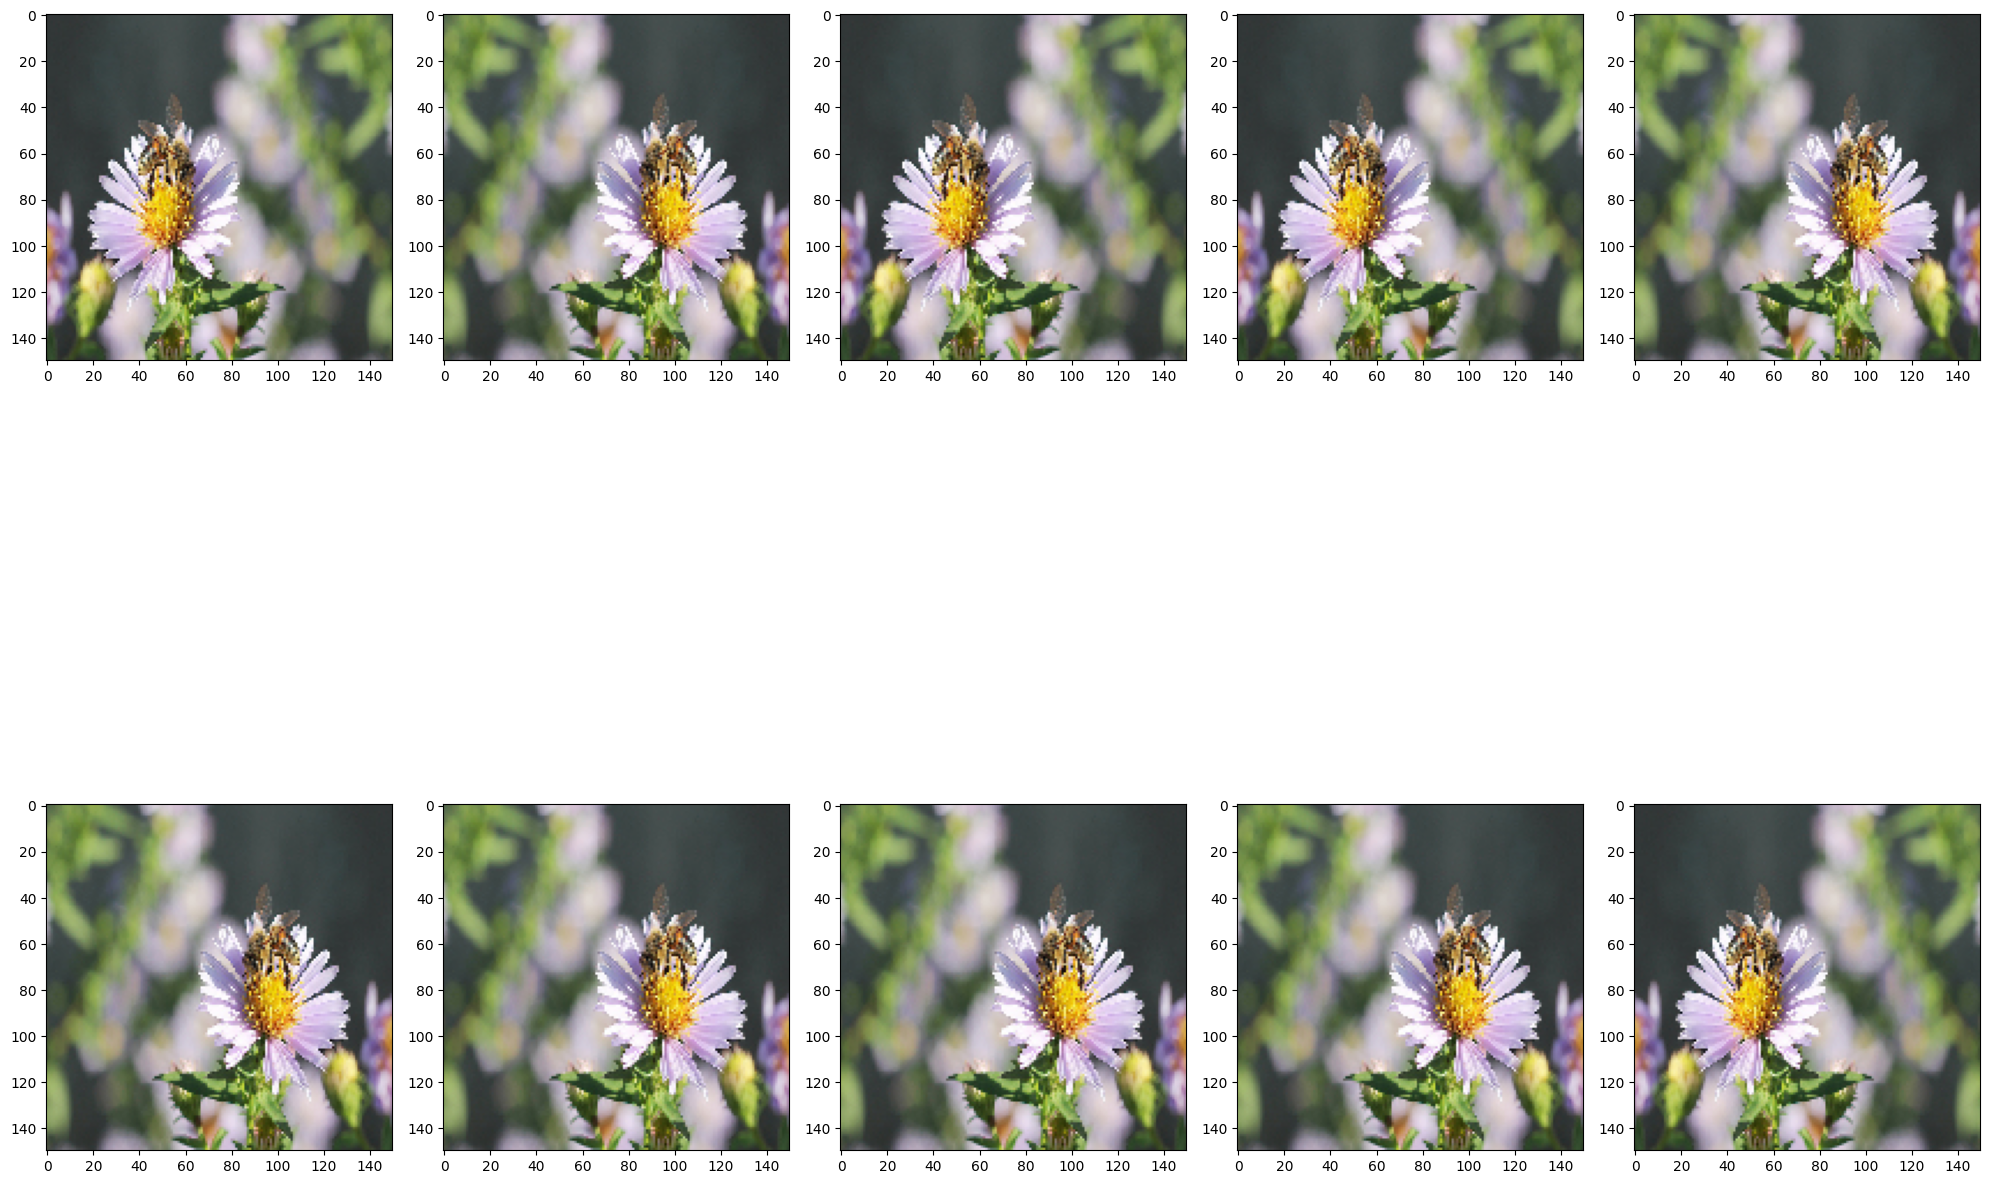

In [18]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][4] for i in range(10)]
plotImages(augmented_images)

In [19]:

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=(1./255),
    rotation_range=45
)

train_data_gen = image_gen.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(150,150),
    shuffle=True,
    class_mode='categorical' 
)

# val_data_gen = image_gen.flow_from_directory(
#     val_dir,
#     batch_size=batch_size,
#     target_size=(150,150),
#     shuffle=False 
# )

Found 2935 images belonging to 5 classes.


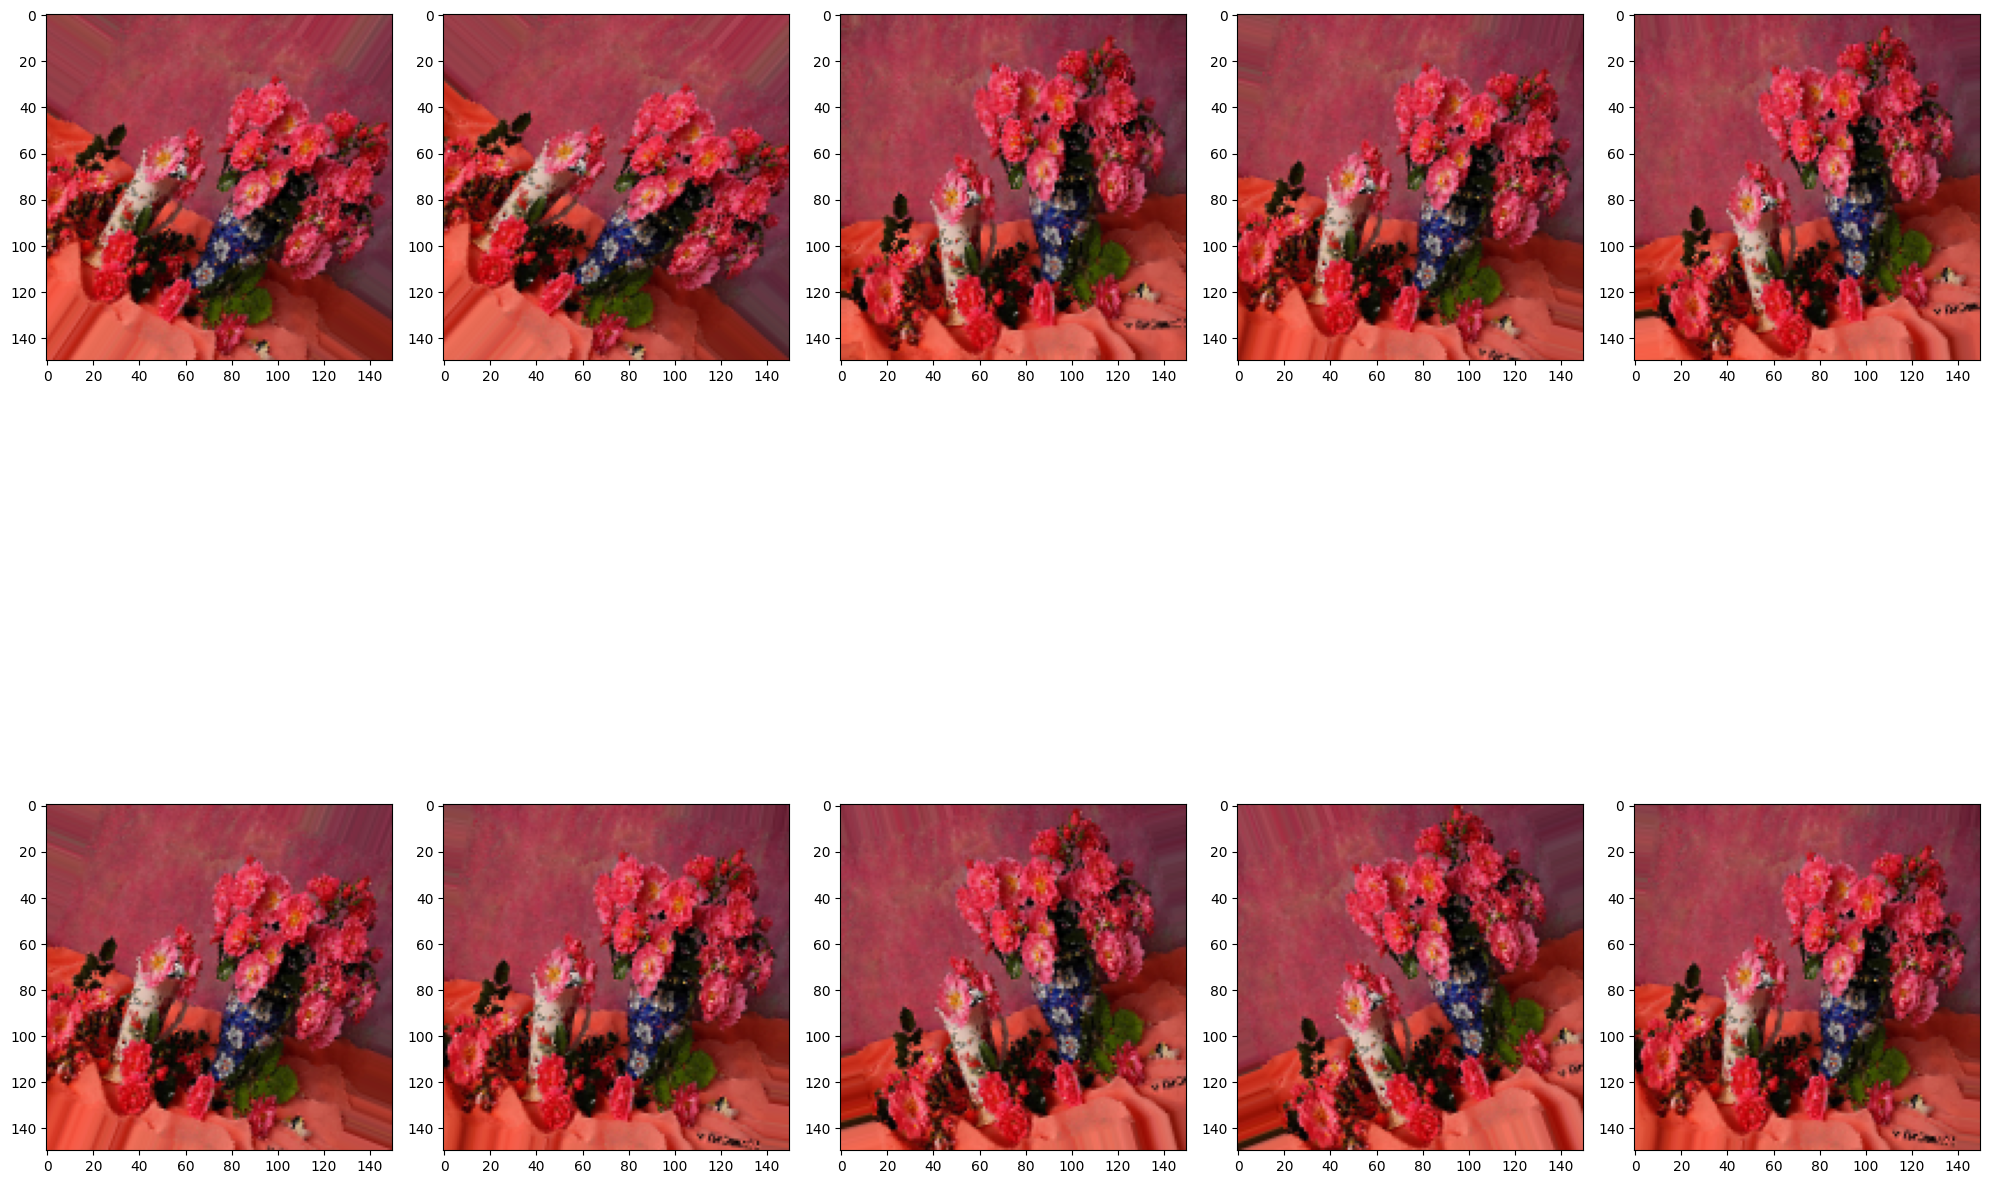

In [20]:
augmented_images = [train_data_gen[0][0][10] for i in range(10)]
plotImages(augmented_images)

In [21]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=(1./255),
    zoom_range=0.50
)

train_data_gen = image_gen.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(150,150),
    shuffle=True,
    class_mode='categorical' 
)

Found 2935 images belonging to 5 classes.


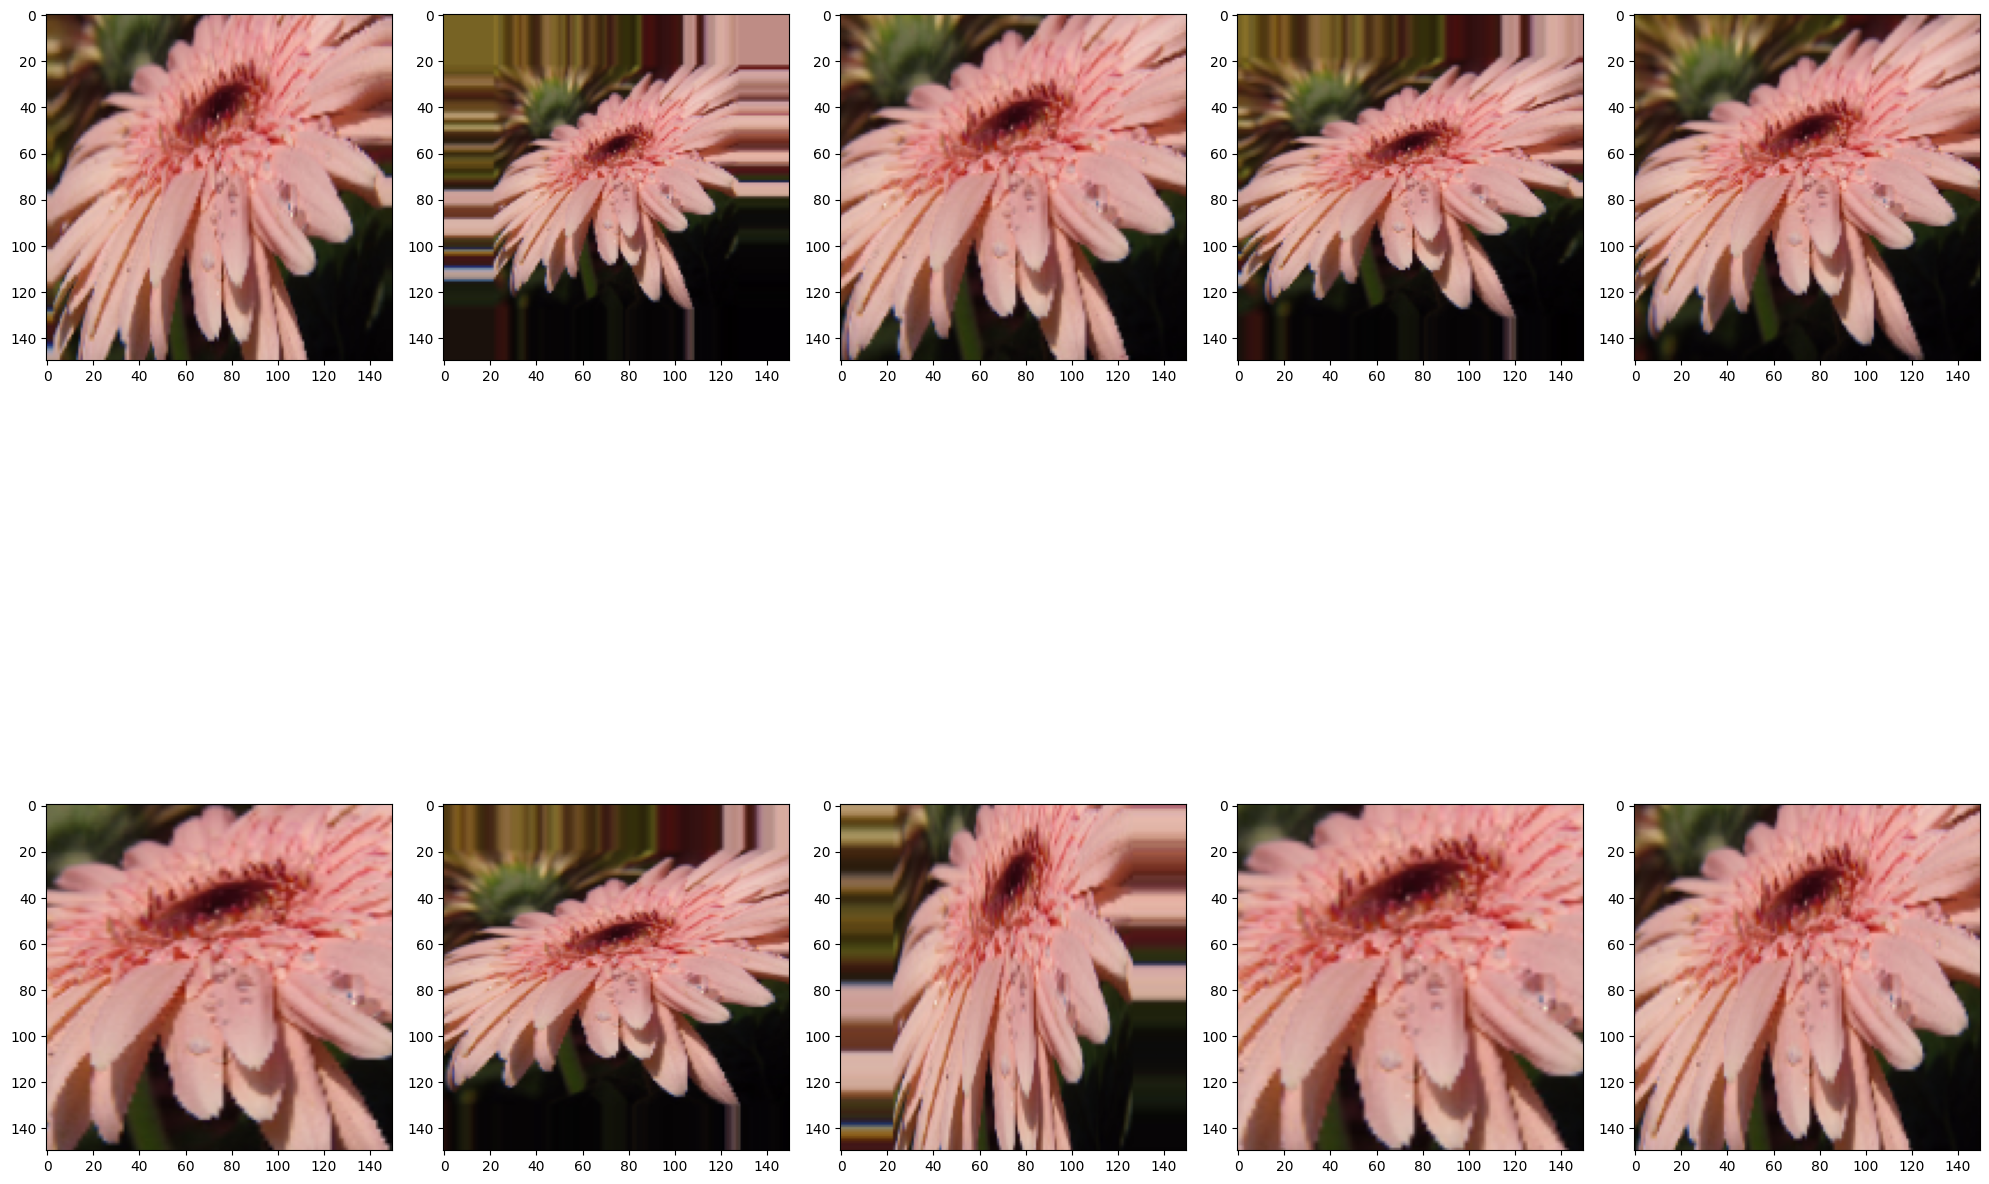

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [23]:
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=(1./255),
    rotation_range=45,
    zoom_range=0.45,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15
)


train_data_gen = image_gen_train.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

Found 2935 images belonging to 5 classes.


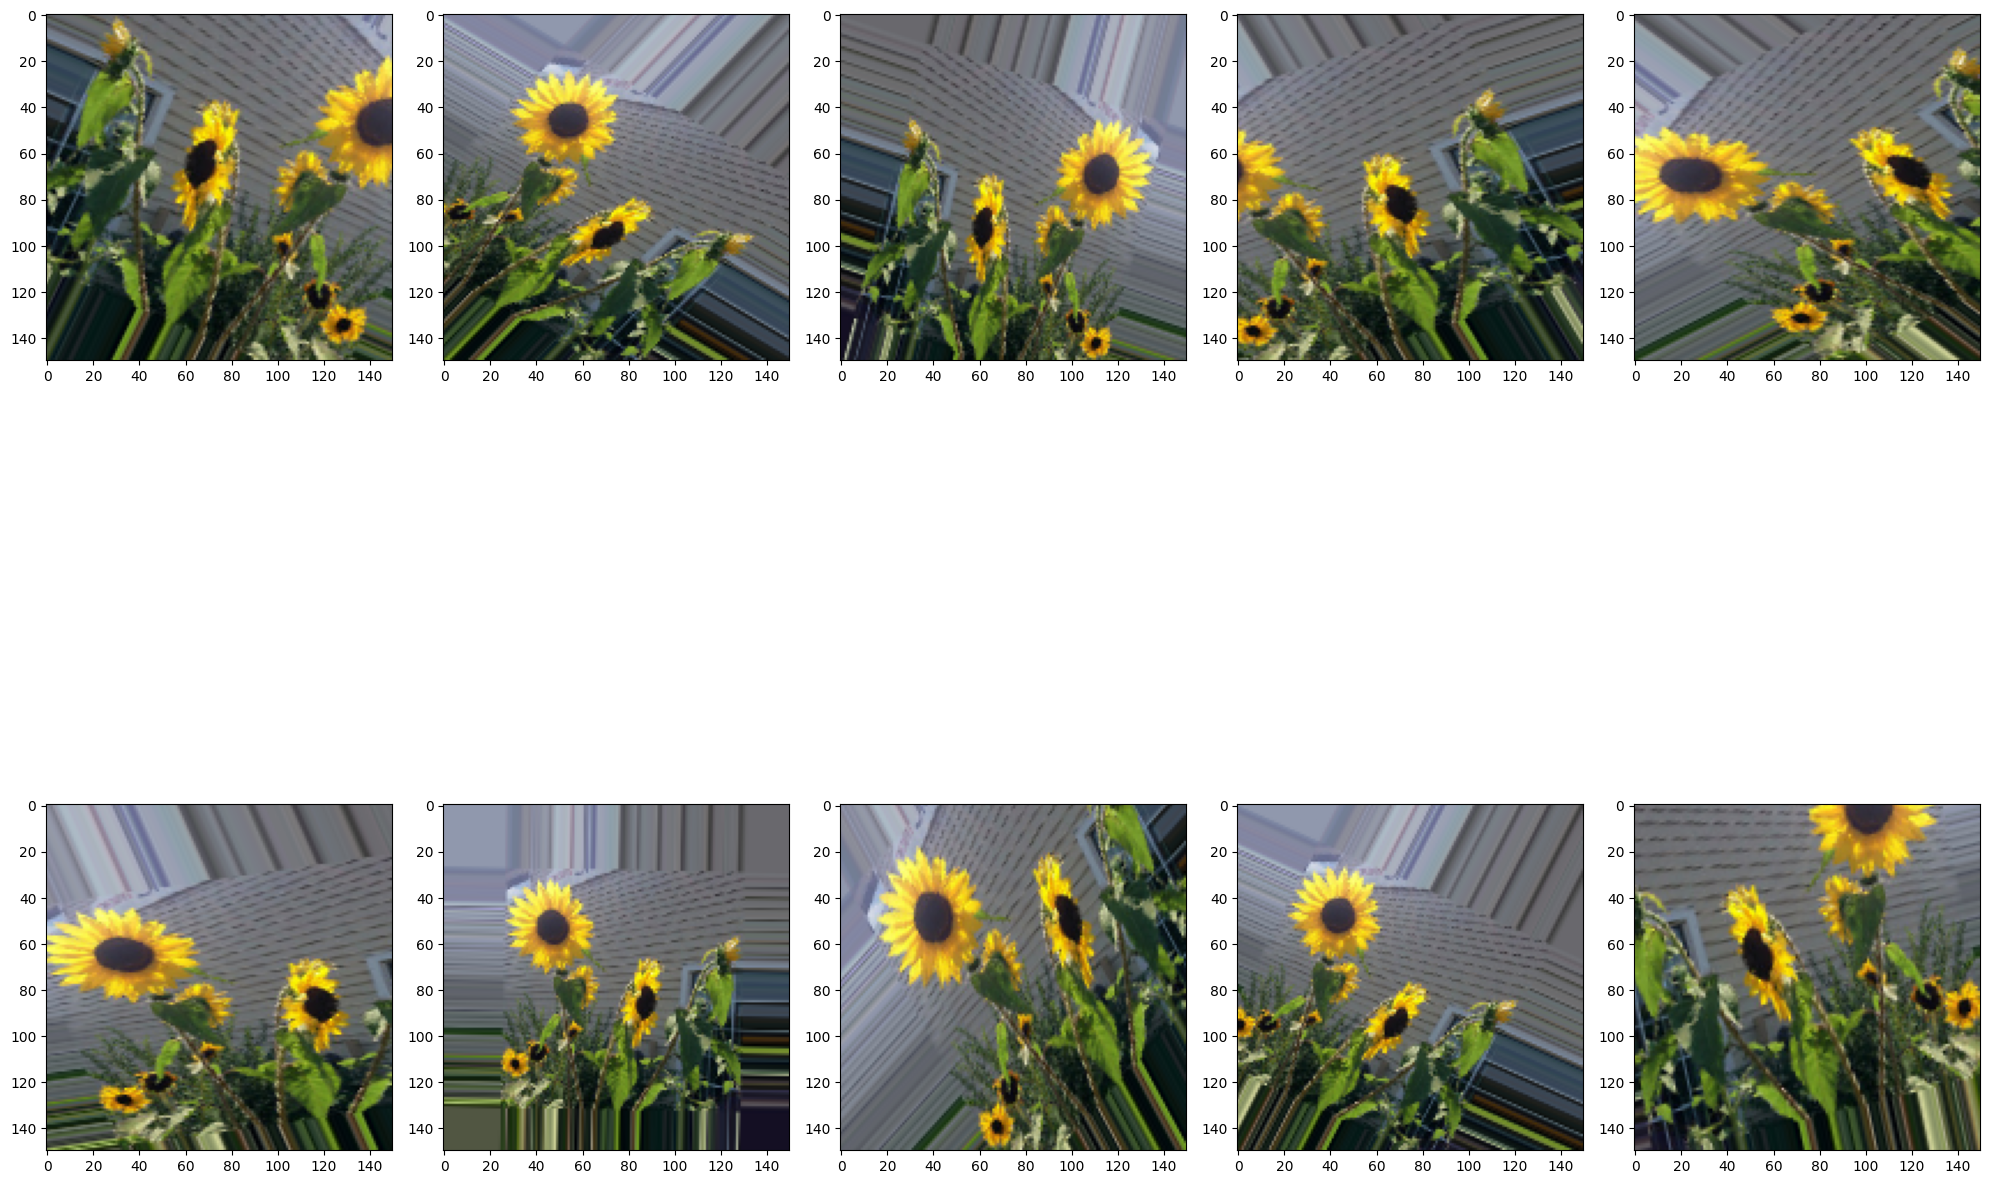

In [24]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [25]:
image_gen_val = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=(1./255)
)
val_data_gen = image_gen_val.flow_from_directory(
    val_dir,
    batch_size=batch_size,
    target_size=(150,150),
    class_mode='categorical'
)

Found 735 images belonging to 5 classes.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten 
model = Sequential([
    Conv2D(32,(3,3), input_shape=(150,150,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3), input_shape=(150,150,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),    
    Conv2D(128,(3,3), input_shape=(150,150,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(256,(3,3),input_shape=(150,150,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.2),
    Dense(1568, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
    ])

c:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from tensorflow.keras.optimizers import Adam

# Compile the model with sparse categorical crossentropy (for integer-encoded labels)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1568)           │    19,670,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       803,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,864,869 (79.59 MB)

 Trainable params: 20,864,869 (79.59 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
epochs = 30

history= model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples//train_data_gen.batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= val_data_gen.samples//val_data_gen.batch_size

)



Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8800 - loss: 0.3258 - val_accuracy: 0.8043 - val_loss: 0.6154
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8600 - loss: 0.3496 - val_accuracy: 0.7429 - val_loss: 0.6101
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8860 - loss: 0.3335 - val_accuracy: 0.7857 - val_loss: 0.6602
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8700 - loss: 0.3578 - val_accuracy: 0.8857 - val_loss: 0.3975
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8691 - loss: 0.3516 - val_accuracy: 0.8129 - val_loss: 0.6130
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8800 - loss: 0.2853 - val_accuracy: 0.7714 - val_loss: 0.7320
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9008 - loss: 0.2788 - val_accuracy: 0.7943 - val_loss: 0.6349
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8600 - loss: 0.3549 - val_accuracy: 0.6857 - val_loss

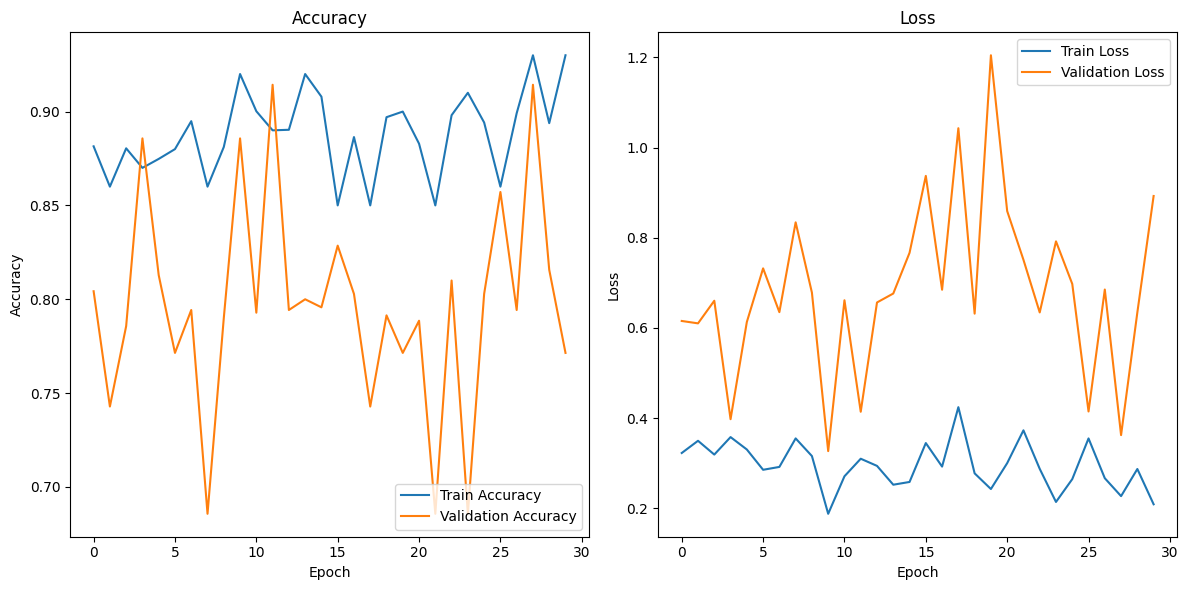

In [39]:
# acc = 
# val_acc = 

# loss = 
# val_loss = 

# epochs_range = 
import matplotlib.pyplot as plt

# Assuming `history` is the output of model.fit()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [40]:
model.save('model30.keras')

In [31]:
# Save model architecture as JSON
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())


In [42]:
model.predict(val_data_gen[0][0][0])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 150, 3), dtype=float32). Expected shape (None, 150, 150, 3), but input has incompatible shape (32, 150, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 150, 3), dtype=float32)
  • training=False
  • mask=None